# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

In [7]:
# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


os.environ['OMP_NUM_THREADS'] = '1'

In [8]:

data = pd.read_csv('Mall_Customers.csv')  # Replace with your actual CSV file path


print(data.head())

# Data Preprocessing

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

#selecting features
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Standardizing the data and finding number of clusters through elbow method
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


inertia = []
silhouette_scores = []


In [10]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

Text(0, 0.5, 'Silhouette Score')

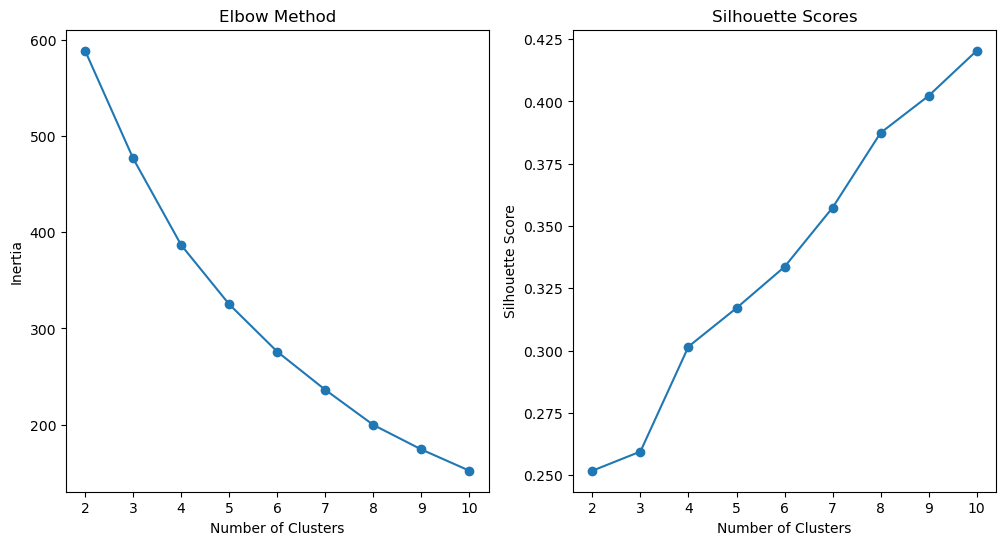

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [12]:
optimal_clusters = 5  

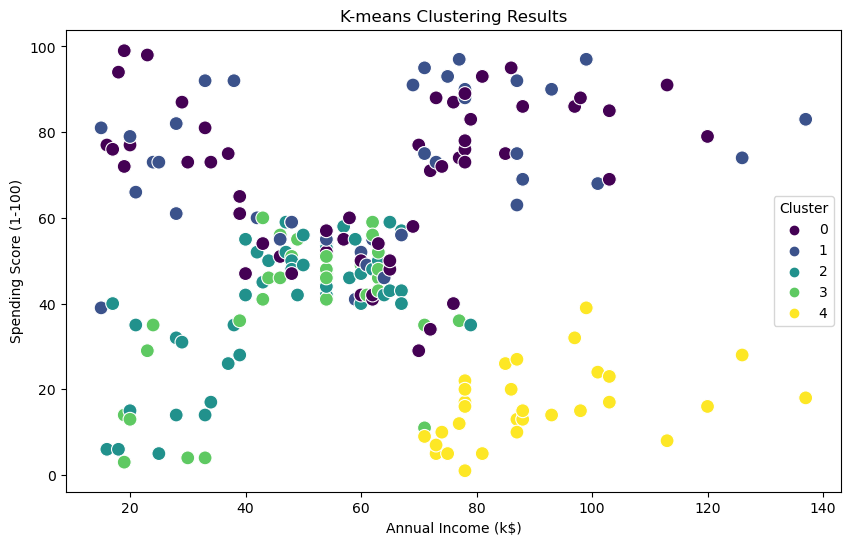

In [13]:
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)  # Set n_init explicitly
data['Cluster'] = kmeans.fit_predict(features_scaled)

# clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('K-means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [15]:
silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}')




Silhouette Score for 5 clusters: 0.32
